<a href="https://colab.research.google.com/github/faruk17035/MachineLearning-Using-GoogleColab/blob/main/Enzyme_A%2BX_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam

import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/Enzyme A+X.xlsx' 
df = pd.read_excel(file_name, index_col=0)
print(df.head()) # print the first 5 rows

            PubchemFP2  PubchemFP3  PubchemFP4  ...  BiGram399  BiGram400  Target
PubchemFP1                                      ...                              
1                    1           0           0  ...     3.0730    0.75382       1
1                    1           0           0  ...     2.1047    0.93939       1
1                    1           1           0  ...     2.1047    0.93939       1
1                    1           1           0  ...     2.8391    1.49230       1
1                    1           0           0  ...     1.8568    1.73260       1

[5 rows x 1281 columns]


In [49]:
#Split data into independent (X) and dependent(Y) columns

y = df['Target'].values
X = df.drop('Target', axis=1).values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [51]:
print(X_train.shape)
print(X_test.shape)

(6933, 1280)
(1224, 1280)


In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
X_train = X_train.reshape(6933, 1280,1)
X_test = X_test.reshape(1224, 1280, 1)

In [55]:
epochs = 100
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (1280,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [56]:
model.compile(optimizer=Adam(lr=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [57]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
217/217 [==============================] - 3s 11ms/step - loss: 1.4515 - accuracy: 0.6639 - val_loss: 0.6704 - val_accuracy: 0.6593
Epoch 2/100
217/217 [==============================] - 2s 10ms/step - loss: 0.5686 - accuracy: 0.6749 - val_loss: 0.6061 - val_accuracy: 0.6699
Epoch 3/100
217/217 [==============================] - 2s 9ms/step - loss: 0.5237 - accuracy: 0.6924 - val_loss: 0.4947 - val_accuracy: 0.6944
Epoch 4/100
217/217 [==============================] - 2s 10ms/step - loss: 0.5117 - accuracy: 0.6926 - val_loss: 0.4543 - val_accuracy: 0.7026
Epoch 5/100
217/217 [==============================] - 2s 9ms/step - loss: 0.5080 - accuracy: 0.7029 - val_loss: 0.4596 - val_accuracy: 0.6969
Epoch 6/100
217/217 [==============================] - 2s 9ms/step - loss: 0.4858 - accuracy: 0.6908 - val_loss: 0.4469 - val_accuracy: 0.6953
Epoch 7/100
217/217 [==============================] - 2s 9ms/step - loss: 0.4716 - accuracy: 0.6896 - val_loss: 0.4470 - val_accuracy: 0.6

In [58]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn = model.predict(X_test).ravel()
fpr_4, tpr_4, thresholds = roc_curve(y_test, y_pred_cnn)
from sklearn.metrics import auc
auc_score4 = auc(fpr_4, tpr_4)
auc_score4

0.9307465647950723

In [59]:
#Split data into independent (X) and dependent(Y) columns

Y = df['Target'].values
X = df.drop('Target', axis=1).values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [61]:
### Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
from sklearn.svm import SVC
model2 = SVC(kernel = 'linear',probability=True, random_state = 0)


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

model1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model1.fit(X_train, y_train)


model2.fit(X_train, y_train)

model3 = XGBClassifier(random_state=0)
model3.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr_1, tpr_1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr_2, tpr_2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr_3, tpr_3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])


In [64]:
auc_score1 = 89.20
auc_score2 = 85.64
auc_scor3 = 90.55
auc_score4=91.34

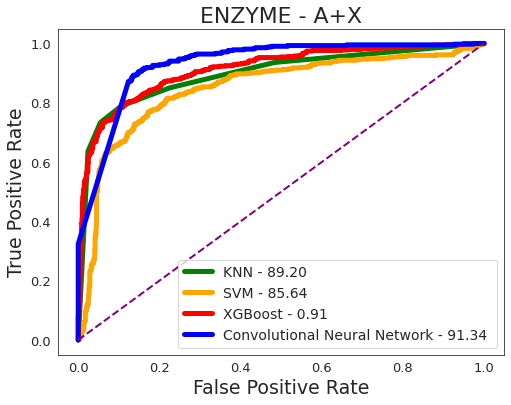

In [65]:
sns.set_style("white")
plt.figure(figsize=(8,6))

plt.plot(fpr_1,tpr_1, color = "green", label = "KNN - %0.2f " %auc_score1, lw = 5)
plt.plot(fpr_2,tpr_2, color = "orange", label = "SVM - %0.2f " %auc_score2, lw = 5)
plt.plot(fpr_3,tpr_3, color = "red", label = "XGBoost - %0.2f " %auc_score3, lw = 5)
plt.plot(fpr_4,tpr_4, color = "blue", label = "Convolutional Neural Network - %0.2f " %auc_score4, lw = 5)

plt.plot([0,1], [0,1], color = 'purple', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize = 19)
plt.ylabel('True Positive Rate', fontsize=19)
plt.title('ENZYME - A+X', fontsize=22)
plt.legend(loc = "lower right", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('ROC_all',dpi=300)
plt.show()